# Example use of pretrained EfficientNet to attempt to classifiy difficult images

In this simple example, we load several images, chop up a tiled image, pre-process it, and classify it with a pretrained EfficientNet.

A modification to the lukmelas example: https://github.com/lukemelas/EfficientNet-PyTorch/tree/2eb7a7d264344ddf15d0a06ee99b0dca524c6a07/examples/simple

In [1]:
import json
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

In [2]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

In [3]:
import requests
import shutil

files = ['BagelDog.jpg','ChihuahuaMuffin.jpg']
urls = ['http://static.boredpanda.com/blog/wp-content/uploads/2016/03/dog-food-comparison-bagel-muffin-lookalike-teenybiscuit-karen-zack__700.jpg',
       'https://i.pinimg.com/originals/bc/b5/5a/bcb55af1a72d37ad406c4a6def58d69c.jpg'
       ]
for file_name, url in zip ( files, urls):
    res = requests.get(url, stream = True)
    if res.status_code == 200:
        with open(file_name,'wb') as f:
            shutil.copyfileobj(res.raw, f)
        print('Image sucessfully Downloaded: ',file_name)
    else:
        print('Image Couldn\'t be retrieved:', file_name)

Image sucessfully Downloaded:  BagelDog.jpg
Image sucessfully Downloaded:  ChihuahuaMuffin.jpg


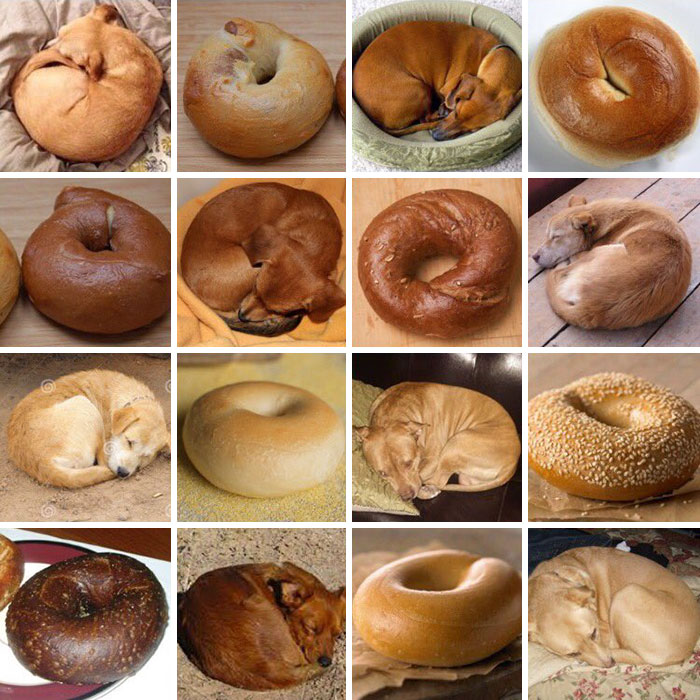

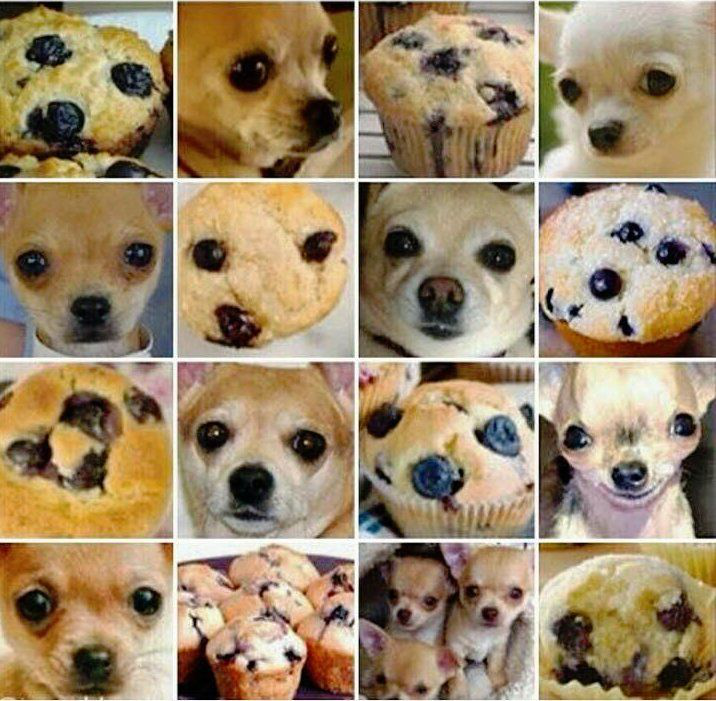

In [4]:
# Open image
#img = Image.open('img.jpg')
dog_bagel_tiles = Image.open('BagelDog.jpg')
display(dog_bagel_tiles)
chihuahua_muffin_tiles = Image.open('ChihuahuaMuffin.jpg')
display(chihuahua_muffin_tiles)

In [5]:
# Split the dogs and bagels into a list
imgwidth, imgheight = dog_bagel_tiles.size
height = int (imgheight / 4)
width = int (imgwidth / 4)

dogbagel=[]

for i in range(0,imgheight,height):
    for j in range(0,imgwidth,width):
        box = (j, i, j+width, i+height)
        dogbagel.append(dog_bagel_tiles.crop(box))
# Split the Chihuahuas and muffins into a list
imgwidth, imgheight = chihuahua_muffin_tiles.size
height = int (imgheight / 4)
width = int (imgwidth / 4)

chihuahuamuffin=[]

for i in range(0,imgheight,height):
    for j in range(0,imgwidth,width):
        box = (j, i, j+width, i+height)
        chihuahuamuffin.append(chihuahua_muffin_tiles.crop(box))


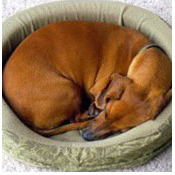

In [6]:
#Check that we can see individual tile
dogbagel[2]

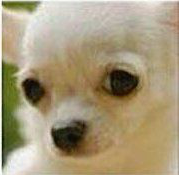

In [7]:
#Check that we can see individual tile
chihuahuamuffin[3]

In [8]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

In [9]:
# Classify with EfficientNet
def Classify(img):
    display(img)
    # Preprocess image
    tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
    img = tfms(img).unsqueeze(0)
    model = EfficientNet.from_pretrained(model_name)
    model.eval()
    with torch.no_grad():
        logits = model(img)
    preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

    print('-----')
    for idx in preds:
        label = labels_map[idx]
        prob = torch.softmax(logits, dim=1)[0, idx].item()
        print('{:<75} ({:.2f}%)'.format(label, prob*100))

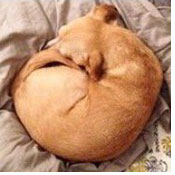

Loaded pretrained weights for efficientnet-b0
-----
Chihuahua                                                                   (8.82%)
Ibizan hound, Ibizan Podenco                                                (7.45%)
vizsla, Hungarian pointer                                                   (5.58%)
bloodhound, sleuthhound                                                     (5.30%)
hog, pig, grunter, squealer, Sus scrofa                                     (4.43%)


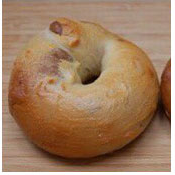

Loaded pretrained weights for efficientnet-b0
-----
bagel, beigel                                                               (97.03%)
pretzel                                                                     (0.39%)
Granny Smith                                                                (0.15%)
chambered nautilus, pearly nautilus, nautilus                               (0.09%)
potpie                                                                      (0.05%)


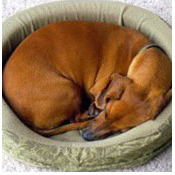

Loaded pretrained weights for efficientnet-b0
-----
redbone                                                                     (70.74%)
Rhodesian ridgeback                                                         (6.94%)
basenji                                                                     (4.11%)
bloodhound, sleuthhound                                                     (2.22%)
miniature pinscher                                                          (1.68%)


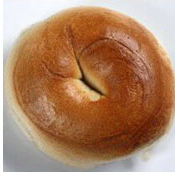

Loaded pretrained weights for efficientnet-b0
-----
bagel, beigel                                                               (96.16%)
Granny Smith                                                                (0.42%)
pretzel                                                                     (0.14%)
potpie                                                                      (0.08%)
French loaf                                                                 (0.05%)


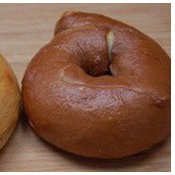

Loaded pretrained weights for efficientnet-b0
-----
bagel, beigel                                                               (97.51%)
pretzel                                                                     (0.16%)
Granny Smith                                                                (0.14%)
French loaf                                                                 (0.03%)
tick                                                                        (0.03%)


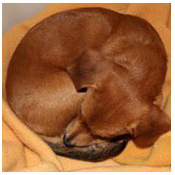

Loaded pretrained weights for efficientnet-b0
-----
redbone                                                                     (23.49%)
Rhodesian ridgeback                                                         (7.47%)
Brabancon griffon                                                           (6.99%)
vizsla, Hungarian pointer                                                   (5.65%)
bloodhound, sleuthhound                                                     (4.11%)


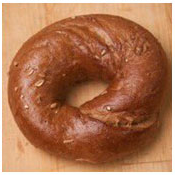

Loaded pretrained weights for efficientnet-b0
-----
bagel, beigel                                                               (65.34%)
pretzel                                                                     (11.72%)
tick                                                                        (0.34%)
Granny Smith                                                                (0.21%)
chain                                                                       (0.21%)


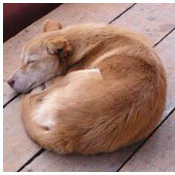

Loaded pretrained weights for efficientnet-b0
-----
golden retriever                                                            (15.61%)
dingo, warrigal, warragal, Canis dingo                                      (14.94%)
Saluki, gazelle hound                                                       (11.66%)
redbone                                                                     (7.48%)
Labrador retriever                                                          (4.05%)


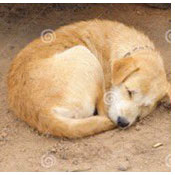

Loaded pretrained weights for efficientnet-b0
-----
dingo, warrigal, warragal, Canis dingo                                      (65.60%)
golden retriever                                                            (2.40%)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 (1.81%)
dhole, Cuon alpinus                                                         (1.63%)
brown bear, bruin, Ursus arctos                                             (1.56%)


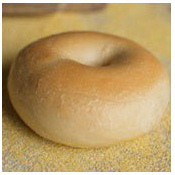

Loaded pretrained weights for efficientnet-b0
-----
bagel, beigel                                                               (90.30%)
mortar                                                                      (0.79%)
dough                                                                       (0.54%)
Granny Smith                                                                (0.37%)
butternut squash                                                            (0.21%)


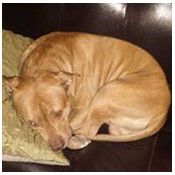

Loaded pretrained weights for efficientnet-b0
-----
Rhodesian ridgeback                                                         (23.62%)
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier (14.60%)
bull mastiff                                                                (7.91%)
vizsla, Hungarian pointer                                                   (4.96%)
bloodhound, sleuthhound                                                     (4.70%)


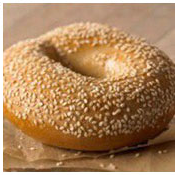

Loaded pretrained weights for efficientnet-b0
-----
bagel, beigel                                                               (85.06%)
pretzel                                                                     (1.48%)
French loaf                                                                 (0.80%)
slug                                                                        (0.12%)
snail                                                                       (0.10%)


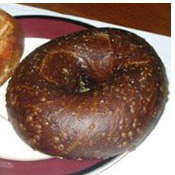

Loaded pretrained weights for efficientnet-b0
-----
bagel, beigel                                                               (72.25%)
pretzel                                                                     (5.24%)
French loaf                                                                 (2.98%)
chambered nautilus, pearly nautilus, nautilus                               (0.94%)
Granny Smith                                                                (0.60%)


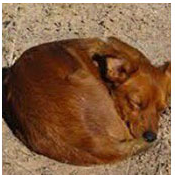

Loaded pretrained weights for efficientnet-b0
-----
kelpie                                                                      (22.51%)
Irish terrier                                                               (14.88%)
redbone                                                                     (10.20%)
Brabancon griffon                                                           (8.06%)
dhole, Cuon alpinus                                                         (7.57%)


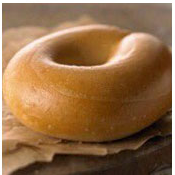

Loaded pretrained weights for efficientnet-b0
-----
bagel, beigel                                                               (72.02%)
mortar                                                                      (5.83%)
potter's wheel                                                              (1.34%)
caldron, cauldron                                                           (1.05%)
candle, taper, wax light                                                    (0.61%)


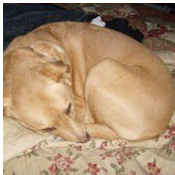

Loaded pretrained weights for efficientnet-b0
-----
bloodhound, sleuthhound                                                     (17.16%)
Rhodesian ridgeback                                                         (14.26%)
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier (8.79%)
bull mastiff                                                                (7.49%)
redbone                                                                     (7.30%)


In [10]:
for i in range(16):
    Classify(  dogbagel[i] )


In [11]:
for i in range(16):
    Classify(  chihuahuasmuffin[i] )

NameError: name 'chihuahuasmuffin' is not defined